In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from natsort import natsorted
from scipy.interpolate import interp1d


In [24]:
base_dir = './nahui/Be4++H'

In [25]:
def gen_wfn_file():
    wfn_dict = {}

    files = os.listdir(base_dir)
    v_files = [file for file in files if file.startswith('v')]

    for v_folder in sorted(v_files):
        v_path = os.path.join(base_dir, v_folder)

        for b_folder in natsorted(os.listdir(v_path)):
            if b_folder[0] == 'b':
                b_path = os.path.join(v_path, b_folder)
                
            # if os.path.isdir(b_path):
            #     # print(f"{v_folder}/{b_folder}")
                    
                files = os.listdir(b_path)
                for file in files:
                    if file == 'prob.out':
                        file_path = os.path.join(b_path, file)

                        with open(file_path, 'r') as file:
                            lines = file.readlines()

                            x_vals = []
                            y_vals = []

                            for line in lines:
                              if '#' not in line:
                                columns = line.split()
                                x_vals.append(float(columns[0]))
                                y_vals.append(float(columns[1]))
                            
                            x_vals_to_int = []
                            y_vals_to_int = []
                
                            for i, x in enumerate(x_vals):
                                if x >= 15:
                                    x_vals_to_int.append(x)
                                    y_vals_to_int.append(y_vals[i])
                    
                            if v_folder in wfn_dict:
                                wfn_dict[v_folder][b_folder] = (x_vals_to_int, y_vals_to_int)
                            else:
                                wfn_dict[v_folder] = {}
                                wfn_dict[v_folder][b_folder] = (x_vals_to_int, y_vals_to_int)
    return wfn_dict

In [26]:
def plot_final_wf(wfn_dict):
    plt.plot(wfn_dict['v=0.4475']['b=1.2'][0], wfn_dict['v=0.4475']['b=1.2'][1])

In [27]:
def get_cross_secs(wfn_dict):
    cross_sections_dict = {}
    b_set = set()

    for v in wfn_dict:
        cross_sections_list = []
        for b in wfn_dict[v]:   
            x_vals, y_vals = wfn_dict[v][b]

            b_parts = b.split('=')
            b = float(b_parts[1])
            b_set.add(b)

            cross_section = 2 * np.pi * b * trapz(y_vals, x_vals)
            # check = trapz(y_vals, x_vals)
            # print(check, f'{v},{b}')
            cross_sections_list.append(cross_section)

            if b==0.4:
                cross_sections_list.insert(0,0)
        
        cross_sections_dict[v] = cross_sections_list

    b_set.add(0)
    bs = sorted(b_set)

    for key in cross_sections_dict:
        v_parts = key.split('=')
        v = float(v_parts[1])

        if v < 1:
            f = interp1d(bs, cross_sections_dict[key], kind='cubic')
            x_new = np.linspace(0, 10, 100)
            y_new = f(x_new)
            plt.scatter(bs, cross_sections_dict[key])
            plt.plot(x_new, y_new)
            plt.xlabel('b')
            plt.ylabel('2pi * b * P(b)')
            plt.title(f'{key}')
            plt.show()
        else:
            plt.plot(bs, cross_sections_dict[key], label=f'{key}')
            plt.scatter(bs, cross_sections_dict[key])
            plt.xlabel('b')
            plt.ylabel('2pi * b * P(b)')
            plt.legend()
            plt.show()

        # plt.plot(bs, cross_sections_dict[key], label=f'{key}')
        # plt.scatter(bs, cross_sections_dict[key])
        # plt.xlabel('b')
        # plt.ylabel('2pi * b * P(b)')
        # plt.legend()
        # plt.show()

            
    return cross_sections_dict, bs


In [28]:
## Experimental data 
# H+ 
gealy_energy = [0.125, 0.177, 0.25, 0.354, 0.5, 0.707, 1, 1.414, 2]
gealy_xsec = np.array([24.5, 20.2, 21.9, 20.8, 18.9, 17.9, 16.3, 15.1, 13.9]) * 1E-16

hvel_energy = [250, 400, 500, 600]
hvel_xsec = [1.65E-19, 1.55E-20, 5.45E-21, 1.87E-21]

# schwab_energy = np.array([2000, 3500, 5000, 7500])
# schwab_xsec = np.array([5.25E-24, 2.14E-25, 3.10E-26, 4.10E-27])

mcc_energy = [1.92, 2.41, 3.04, 3.82, 4.8, 6.05, 7.62, 9.6, 12.1, 15.2, 
                       19.2, 24.1, 30.1, 38.2, 48.0, 60.5, 76.2, 100, 117.5]
mcc_xsec = np.array([13.3, 13.6, 12.1, 11.1, 10.5, 9.85, 8.8, 8.6, 7.5, 6.5, 5.0, 4.1, 
                     2.97, 1.86, 1.10, 0.60, 0.30, 0.124, 0.064]) * 1E-16

# He2+ 
havner_energy = (0.38, 0.53, 0.65, 0.8, 1.06, 1.49, 2.01, 2.62)
havner_xsec = np.array([0.52, 0.53, 1.01, 1.06, 2.58, 4.14, 5.84, 8.12]) * 1E-16

shah_energy = [6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 16.0,
    18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 33.7, 37.5, 41.2,
    45.0, 48.7, 52.5, 58.1, 67.5, 77.0, 87.5, 97.5, 108.5, 118.0,
    127.0, 136.0, 145.0, 165.0, 174.0, 183.0, 197.0,
    204.5, 225.5, 241.0, 256.5, 277.5, 285.5, 292.0, 304.0, 327.0, 343.0]
shah_xsec = np.array([6.0, 6.9, 7.4, 8.0, 9.15, 9.85, 10.8, 11.3, 11.6, 12.2, 11.6, 12.0, 12.3, 12.4, 12.2, 12.5, 12.3, 11.9, 12.1, 11.8, 
             11.2, 11.1, 10.5, 9.6, 8.6, 6.2, 5.9, 4.5, 3.5, 4.0, 3.1, 2.4, 2.0, 2.0, 1.6, 1.3, 1.15, 0.8,  0.77, 
             0.52, 0.53, 0.47, 0.42, 0.28, 0.28]) * 1E-16


# Li3+ 
seim_energy = [9, 10.5, 12, 13.5, 15.6, 18, 21, 24, 27, 30, 33, 37.8, 42]
seim_xsec = np.array([4.4, 4.5, 4.73, 6.15, 6.4, 7.6, 8.3, 9, 9.6, 10.7, 12.4, 12.3, 13.1]) * 1E-16

shah_li_energy = [100, 150, 200, 300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 900]
shah_li_xsec = [1.6E-15, 1.7E-15, 1.5E-15, 1.1E-15, 7E-16, 6.3E-16, 4.7E-16, 3.0E-16, 2.0E-16, 1.6E-16, 1.7E-16, 1.5E-16, 8.1E-17, 5.2E-17]


In [29]:
## Theoretical data

# H+
ryu_energy = [0.1, 0.4, 1, 4, 10, 25, 50, 100, 200, 300, 500]
ryu_xsec = [2.76E-15, 1.99E-15, 1.63E-15, 1.09E-15, 7.95E-16, 3.18E-16, 9.62E-17, 1.54E-17, 1.29E-18, 2.35E-19, 2.2E-20]

harel_v = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
harel_h_x = [2.95E-15, 2.28E-15, 1.73E-15, 1.42E-15, 1.19E-15, 1.03E-15, 9.17E-16, 7.99E-16, 6.77E-16, 5.6E-16, 4.55E-16]

# He2+
harel_he_x = [1.2E-17, 2.6E-17, 2.51E-16, 7.08E-16, 1.05E-15, 1.25E-15, 1.32E-15, 1.35E-15, 1.29E-15, 1.2E-15, 1.07E-15]

min_e = np.array([1, 2, 5, 10, 25, 50, 70, 100, 200, 500, 700])*4
# min_e_ltdse = [1, 2, 5, 10, 25, 50, 100, 200, 500]
min_x_ltdse = [2.91E-16, 6.64E-16, 1.21E-15, 1.38E-15, 1.07E-15, 4.05E-16, None, 5.66E-17, 4.57E-18, 8.47E-20, None]
min_x_aocc = [2.51E-16, 6.31E-16, 1.19E-15, 1.34E-15, 1.05E-15, 4.15E-16, 1.81E-16, 6.31E-17, 5.12E-18, 1.03E-19, 1.97E-20]
min_x_ctmc = [7.57E-16, 8.23E-16, 8.39E-16, 8.32E-16, 7.98E-16, 4.39E-16, 2.16E-16, 6.99E-17, 5.34E-18, 1.19E-19, 2.8E-20]

toshima_e = np.array([1,2,3,4,5,6.25,7,9,10,12.5,15,20,25,30,50,63,75,100,150,200,400])
toshima_he_x = [2.56E-16, 6.37E-16, None, None, None, None, 1.28E-15, None, 1.33E-15, None, 1.29E-15, 1.16E-15, 9.98E-16, 8.34E-16, 3.62E-16,
                2.08E-16, 1.31E-16, 5.59E-17, 1.31E-17, 4.39E-18, 2.52E-19]

winter_e = [8, 20, 40, 70, 200, 400, 800]
winter_x = np.array([62.2, 118, 132, 123, 42.4, 7.1, 0.53]) * 1E-17

ludde_he_e = np.array([2,4,5,6,10,25,50])*4
ludde_he_x = np.array([83.6, 101.57, 109.27, 112.28, 120, 72.3, 29.5])*1E-17


# Li3+ 
ryu_li_energy = np.array([0.1, 0.2, 0.5, 1, 2, 5, 10, 25, 50, 75, 100, 200]) * 7
ryu_li_xsec = [7.03E-16, 8.05E-16, 7.91E-16, 8.42E-16, 7.96E-16, 1.33E-15, 1.75E-15, 1.35E-15, 6.74E-16, 3.25E-16, 1.63E-16, 1.9E-17]

ludde_li_e = np.array([2,3,4,6,10,25,50])*7
ludde_li_x = np.array([53.8, 76.4, 101.7, 146.5, 176.4, 173, 97.3]) * 1E-17

harel_li_x = [8.25E-17, 1.3E-16, 2.6E-16, 5.63E-16, 9.3E-16, 1.42E-15, 1.74E-15, 1.91E-15, 1.97E-15, 1.92E-15, 1.81E-15]

toshima_li_x = [2.67E-16, None, 7.32E-16, None, 1.18E-15, None, None, None, 1.81E-15, None, None, None, 1.68E-15, None, 7.67E-16, 
                None, 3.13E-16, 1.4E-16, 3.13E-17, 1.05E-17, 5.58E-19] 

fritsch_e = [3,5,7,10,15,20,35,50,70,100]
fritsch_x = np.array([16.9, 21.4, 26.4, 35, 51.5, 65, 107, 142, 163, 166])*1E-17



# Be4+ 
ludde_be_e = [4, 7, 10, 25, 50]
ludde_be_x = np.array([316, 317, 312, 243, 137]) * 1E-17

harel_be_x = [1.48E-15, 2.78E-15, 3.77E-15, 3.69E-15, 3.42E-15, 3.29E-15, 3.14E-15, 3.01E-15, 2.88E-15, 2.71E-15, 2.5E-15]

toshima_be_x = [3.74E-15, 3.76E-15, None, 3.39E-15, None, 3.27E-15, None, 3.11E-15, None, 2.97E-15, None, None, 2.37E-15, None, 1.13E-15, None,
                4.94E-16, 2.33E-16, 6.43E-17, 2.17E-17, 1.17E-18]

fritsch_be_e = np.array([0.1, 0.2, 0.5, 1,2, 2, 5,10,20])*9
fritsch_be_x = np.array([1.28, 2.13, 2.98, 3.49, 3.47, 3.68, 3.32, 2.94, 2.28])*1E-15

zia_e = np.array([1,5,10,35,55,70,90,200])*9
zia_x_ctmc = np.array([9.923, 12.896, 13.159, 9.279, 5.200, 3.209, 1.650, 0.093])*1E-16
zia_x_qctmc = np.array([27.637, 23.543, 21.257, 10.301, 4.894, 2.872, 1.277, 0.0947])*1E-16

In [30]:
def plot_total_cross_secs(cross_sections_dict, bs):
    bohr_rad = 2.8E-17 # cm^2 
    IP_H = 13.6 # eV
    if "p+" in base_dir:
        proj_mass = 1836 # au H+
    elif 'alpha' in base_dir:
        proj_mass =  7344 # He2+
    elif 'Li' in base_dir:
        proj_mass = 11016 # Li3+
    elif 'Be' in base_dir:
        proj_mass = 14688 # Be4+ 

    total_cross_sections = []
    vs = []

    for v_key, cross_sections in cross_sections_dict.items():
        total_cross_section = trapz(cross_sections, bs)
        total_cross_sections.append(total_cross_section)
        v_parts = v_key.split('=')
        v_value = float(v_parts[1])
        vs.append(v_value)

    energy = (np.array(vs)**2 * proj_mass * IP_H) / 1E3
    harel_e = (harel_v**2 * proj_mass * IP_H) / 1E3
    # print(vs)
    print(f'Energy (kev):{energy}')
    print(total_cross_sections * np.array(bohr_rad))

    plt.plot(energy, total_cross_sections * np.array(bohr_rad))

    if "p+" in base_dir:
        plt.scatter(gealy_energy, gealy_xsec, marker='o', label = 'Gealy')
        plt.scatter(hvel_energy, hvel_xsec, marker='x', label = 'Hvelplund')
        plt.scatter(mcc_energy, mcc_xsec, marker='+', label = 'McClure')
        plt.scatter(ryu_energy, ryu_xsec, marker='^', label = 'UDWA Ryufuku')
        plt.scatter(harel_e, harel_h_x, label = 'MOCC Harel')

        plt.title('H++H')

    elif 'alpha' in base_dir:
        plt.scatter(shah_energy, shah_xsec, marker='o', label = 'Shah')
        plt.scatter(havner_energy, havner_xsec, marker='x', label = 'Havner')
        plt.scatter(harel_e, harel_he_x, label = 'MOCC Harel')
        plt.scatter(min_e, min_x_ltdse, label= 'LTDSE Minami')
        plt.scatter(min_e, min_x_aocc, label = 'AOCC Minami')
        plt.scatter(min_e, min_x_ctmc, label = 'CTMC Minami')
        plt.scatter(toshima_e*4, toshima_he_x, label = 'AOCC Toshima')
        plt.scatter(winter_e, winter_x, label='Sturmian Winter')
        plt.scatter(ludde_he_e, ludde_he_x, label='TDSE Ludde')

        plt.title('He2++H')

    elif 'Li' in base_dir:
        plt.scatter(seim_energy, seim_xsec, marker='o', label = 'Seim')
        plt.scatter(shah_li_energy, shah_li_xsec, marker='x', label='Shah')
        plt.scatter(ryu_li_energy, ryu_li_xsec, label = 'UDWA Ryufuku')
        plt.scatter(ludde_li_e, ludde_li_x, label = 'TDSE Ludde')
        plt.scatter(harel_e, harel_li_x, label = 'MOCC Harel')
        plt.scatter(toshima_e*7, toshima_li_x, label='AOCC Toshima')
        plt.scatter(fritsch_e, fritsch_x, label = '24 AO+ Fritsch')
    

        plt.title('Li3+H')

    elif 'Be' in base_dir:
        plt.scatter(ludde_be_e, ludde_be_x, label='TDSE Ludde')
        plt.scatter(harel_e, harel_be_x, label = 'MOCC Harel')
        plt.scatter(toshima_e*9, toshima_be_x, label='AOCC Toshima')
        plt.scatter(fritsch_be_e, fritsch_be_x, label='A0+ Fritsch')
        plt.scatter(zia_e, zia_x_ctmc, label='CTMC Ziaeian')
        plt.scatter(zia_e, zia_x_qctmc, label='QCTMC Ziaeian')

        plt.title('Be4++H')

    plt.legend()
    plt.xlabel('energy kev/u')
    # plt.ylabel('total cross sections (cm^2)')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()


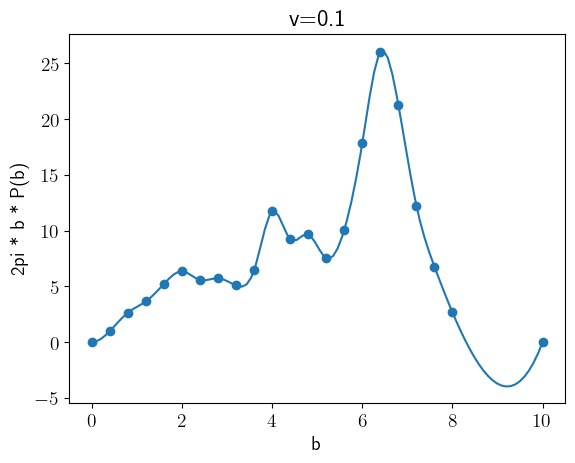

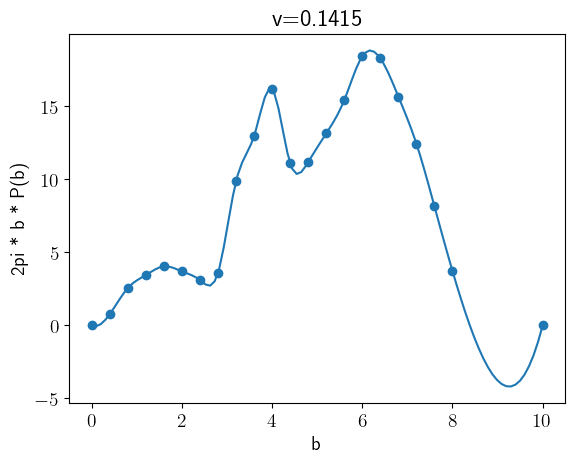

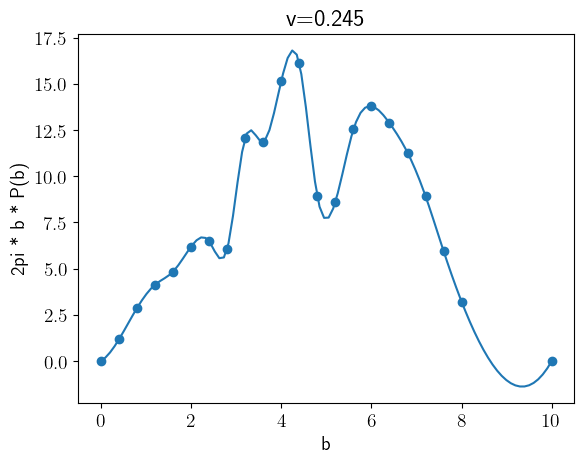

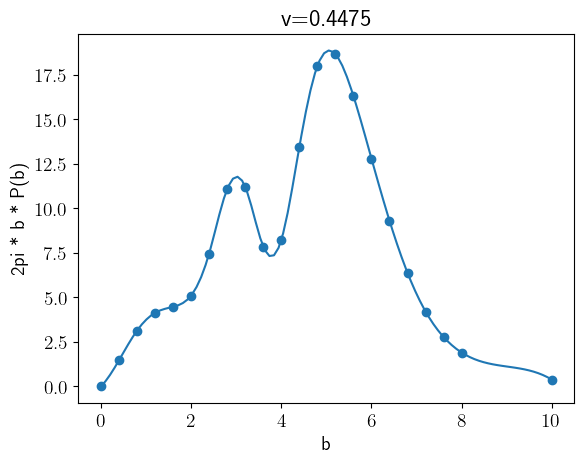

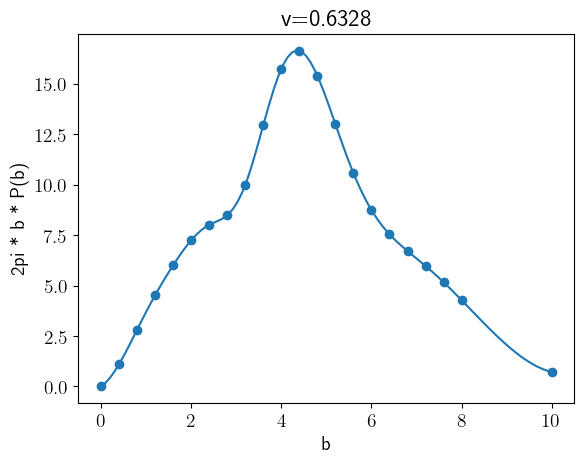

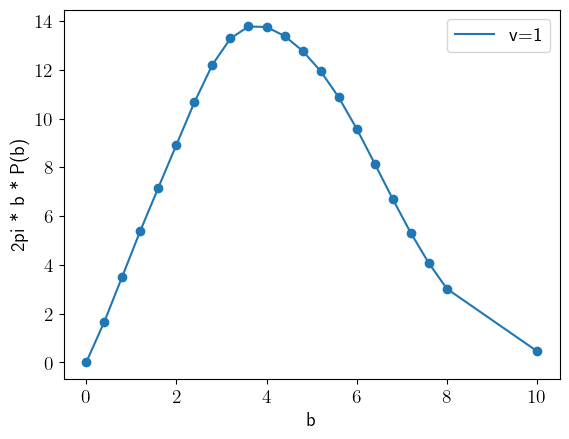

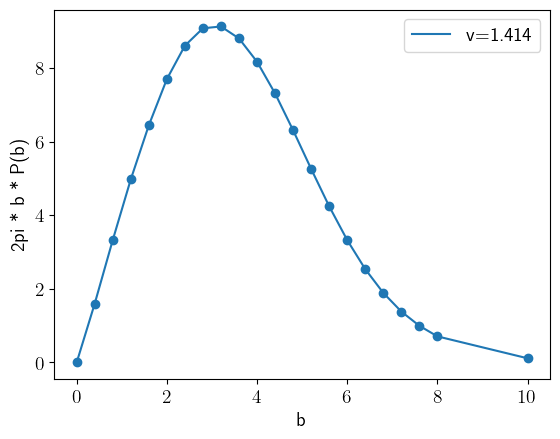

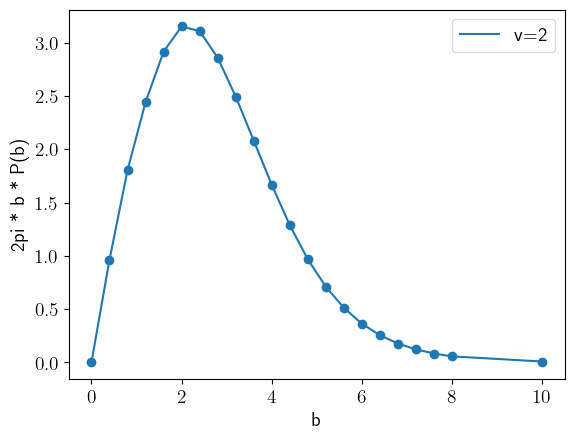

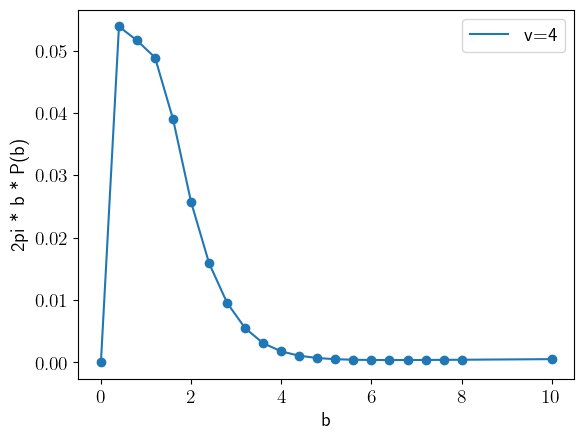

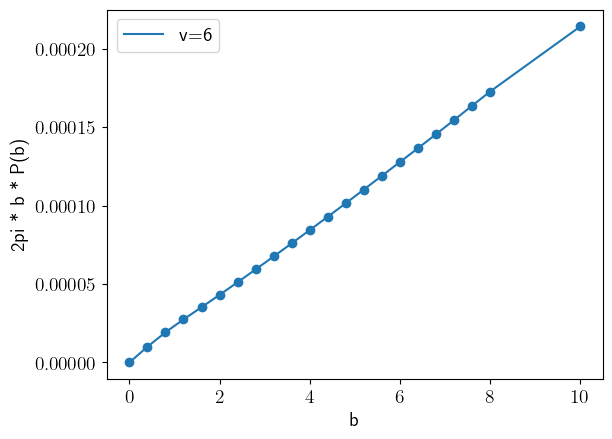

Energy (kev):[1.99756800e+00 3.99958059e+00 1.19904019e+01 4.00025477e+01
 7.99897820e+01 1.99756800e+02 3.99392947e+02 7.99027200e+02
 3.19610880e+03 7.19124480e+03]
[2.03860092e-15 2.18729359e-15 2.01045109e-15 1.93275547e-15
 2.02895623e-15 2.05344735e-15 1.15948553e-15 3.15442023e-16
 2.93839793e-18 3.00339075e-20]


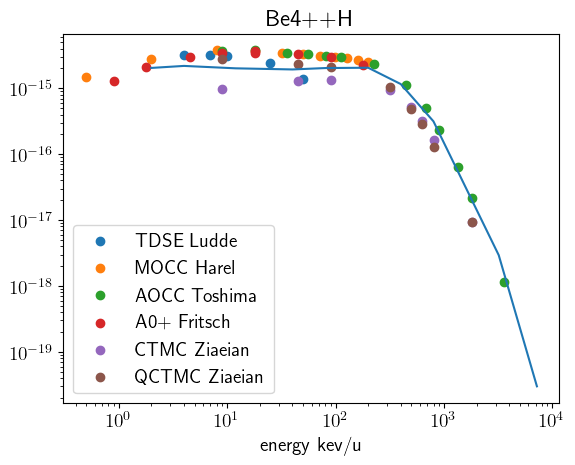

In [31]:
wfn_dict = gen_wfn_file()
cross_sections_dict, bs = get_cross_secs(wfn_dict)
plot_total_cross_secs(cross_sections_dict, bs)

In [32]:
p = [2.34869348e-15, 2.07388522e-15, 1.62932996e-15, 1.12074365e-15,
 8.88270337e-16, 4.09369070e-16, 1.26109790e-16, 2.08751308e-17,
 1.74960193e-19, 3.22804708e-20]

alpha = [4.47105947e-17, 1.75306811e-16, 8.41971454e-16, 1.51538279e-15,
 1.54165335e-15, 1.08599496e-15, 4.45208677e-16, 9.51094891e-17,
 5.97726112e-19, 3.14743597e-20]

li = [1.19197731e-16, 2.02710631e-16, 5.67184024e-16, 1.52879751e-15,
 1.97791697e-15, 1.63037488e-15, 7.76349255e-16, 1.95745356e-16,
 1.53747022e-18, 3.07269997e-20]

be = [2.03860092e-15, 2.18729359e-15, 2.01045109e-15, 1.93275547e-15,
 2.02895623e-15, 2.05344735e-15, 1.15948553e-15, 3.15442023e-16,
 2.93839793e-18, 3.00339075e-20]

In [33]:
plt.rcParams['text.usetex'] = True # TeX rendering
plt.rcParams.update({'font.size': 14})


plt.plot(energy, p, label = r'$p$')
plt.plot(energy, alpha, label = r'$\alpha$')
plt.plot(energy, li, label = r'$Li^{3+}$')
plt.plot(energy, be, label = r'$Be^{4+}$')
plt.xlabel(r'E (keV/amu)')
plt.ylabel(r'$\sigma_{Total} (cm^2)$')
# plt.title('Ion collisions on H')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.grid(linestyle='dotted')
plt.show()

NameError: name 'energy' is not defined